In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /home/tatsye/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [30]:
import pandas as pd
data = pd.read_csv(f"{path}/books.csv")

In [31]:
data.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [32]:
data.describe(include='all')


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6810,6810,2381,6738,6711,6481,6548,6804.000000,6767.000000,6767.000000,6.767000e+03
unique,NaN,6810,6398,2009,3780,567,6481,6474,NaN,NaN,NaN,NaN
top,NaN,9042003405,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=2lVyR...,No Marketing Blurb,NaN,NaN,NaN,NaN
freq,NaN,1,11,226,37,2588,1,6,NaN,NaN,NaN,NaN
mean,9.780677e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,4.130000,420.000000,5.992500e+03


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


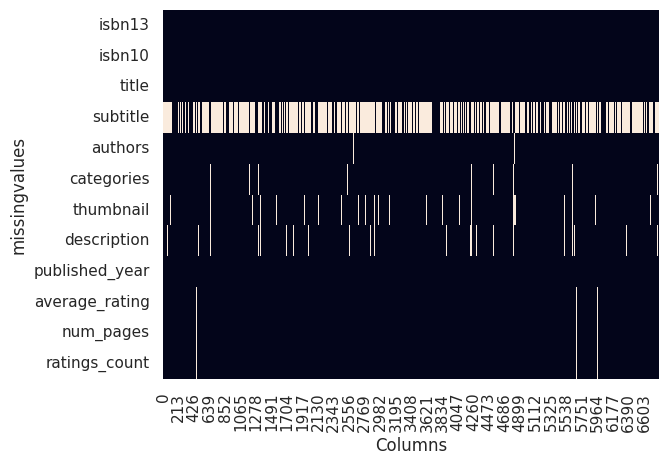

In [35]:
ax = plt.axes()
sns.heatmap(data.isna().T, cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("missingvalues")
plt.show()


In [36]:
import numpy as np

data['Missing_description'] = np.where(data['description'].isna(), 1, 0)
data['age_of_book'] = 2025 - data['published_year']



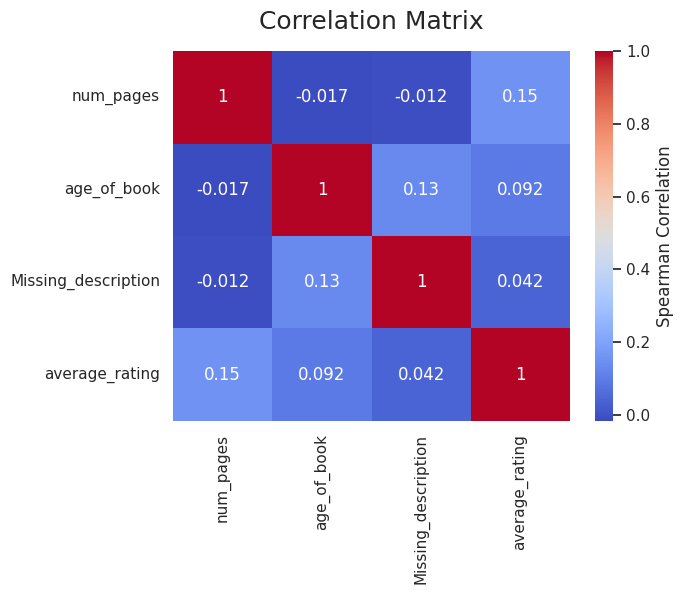

In [37]:
columns_of_intrest = [
    'num_pages',
    'age_of_book',
    'Missing_description',
    'average_rating',
    
]

correlation_matrix = data[columns_of_intrest].corr(method='spearman')
sns.set_theme(style='whitegrid')
plt.Figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
                      cbar_kws={'label': 'Spearman Correlation'})
heatmap.set_title('Correlation Matrix', fontdict={'fontsize': 18}, pad=16)
plt.show()



In [38]:
book_missing = data[ (~data['description'].isna()) &
                    ~(data['num_pages'].isna()) &
                    ~(data['average_rating'].isna()) & 
                    ~(data['published_year'].isna())]

In [39]:
book_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6507 entries, 0 to 6809
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbn13               6507 non-null   int64  
 1   isbn10               6507 non-null   object 
 2   title                6507 non-null   object 
 3   subtitle             2281 non-null   object 
 4   authors              6444 non-null   object 
 5   categories           6474 non-null   object 
 6   thumbnail            6293 non-null   object 
 7   description          6507 non-null   object 
 8   published_year       6507 non-null   float64
 9   average_rating       6507 non-null   float64
 10  num_pages            6507 non-null   float64
 11  ratings_count        6507 non-null   float64
 12  Missing_description  6507 non-null   int64  
 13  age_of_book          6507 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 762.5+ KB


In [40]:
book_missing['categories'].value_counts()

categories
Fiction                       2523
Juvenile Fiction               534
Biography & Autobiography      391
History                        258
Literary Criticism             164
                              ... 
Rock musicians                   1
Banks and banking, British       1
Brothers and sisters             1
Conspiracies                     1
Actresses                        1
Name: count, Length: 531, dtype: int64

In [41]:
book_missing['words_in_description'] = book_missing['description'].apply(lambda x: len(str(x).split()))

/tmp/ipykernel_33209/3226101926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing['words_in_description'] = book_missing['description'].apply(lambda x: len(str(x).split()))


In [42]:
book_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45


In [43]:
book_missing.loc[book_missing['words_in_description'].between(1,4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [44]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]

In [45]:
book_missing_25_words.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                5197 non-null   int64  
 1   isbn10                5197 non-null   object 
 2   title                 5197 non-null   object 
 3   subtitle              1817 non-null   object 
 4   authors               5165 non-null   object 
 5   categories            5167 non-null   object 
 6   thumbnail             5031 non-null   object 
 7   description           5197 non-null   object 
 8   published_year        5197 non-null   float64
 9   average_rating        5197 non-null   float64
 10  num_pages             5197 non-null   float64
 11  ratings_count         5197 non-null   float64
 12  Missing_description   5197 non-null   int64  
 13  age_of_book           5197 non-null   float64
 14  words_in_description  5197 non-null   int64  
dtypes: float64(5), int64(3), o

In [48]:
book_missing_25_words["title_and_subtitle"] = (
    np.where(
        book_missing_25_words['subtitle'].isna(), 
        book_missing_25_words['title'],
        book_missing_25_words[['title', 'subtitle']].astype(str).agg(":".join,axis=1)
    )
)

/tmp/ipykernel_33209/2760541593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"] = (


In [49]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web:A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that:Talks with Sri Nisargadatta Maharaj


In [52]:
book_missing_25_words["tagged description"] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(":".join, axis=1)
book_missing_25_words

/tmp/ipykernel_33209/2695497305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged description"] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(":".join, axis=1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Missing_description,age_of_book,words_in_description,title_and_subtitle,tagged description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883:A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web:A Novel,9780002261982:A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736:A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897:Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934:""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222:On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014:This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623:Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that:Talks with Sri Nisargadatta Maharaj,9788185300535:This collection of the timeless ...


In [57]:
(
    book_missing_25_words
    .drop(['subtitle', 'Missing_description', 'age_of_book', 'words_in_description'], axis=1)
    .to_csv("books_cleaned.csv", index=False)
)
